# <span style = "color:coral"> Customer Behaviour Classification </span>

***

In this project, we will try to predict if the customer purchase the product or not using various machine learning models and Deploy the model with Tkinter library

## Contents

The data represents details about 400 clients of a company including the unique ID, the gender, the age of the customer and the salary. Besides this, we have collected information regarding the buying decision - weather the customer decided to buy specific products or not.

## Let's Begin

### Import all necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Read 'Customer_Behaviour.csv' dataset and store it in a dataframe variable

In [3]:
df = pd.read_csv('Customer_Behaviour.csv')

### View the top 5 rows

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### View info of the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


### View basic statistical information about the dataset

In [6]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


### Check for any null values

In [7]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### View unique values in Gender

In [8]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

### Convert male to 0 and Female to 1 in Gender column

In [9]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})

In [10]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


#### Drop user ID column

In [11]:
df.drop('User ID',axis=1,inplace=True)

## <span style = "color: orange"> Data Visualization </span>

### Plot heatmap to view the correlation between features

<Axes: >

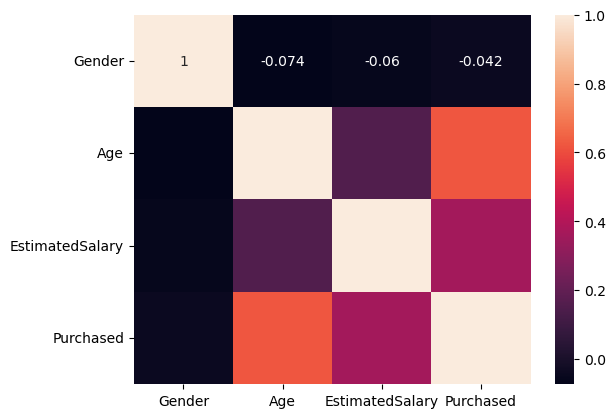

In [12]:
sns.heatmap(df.corr(),annot=True)

### Plot a countplot of gender with respect to purchased

<Axes: xlabel='Gender', ylabel='count'>

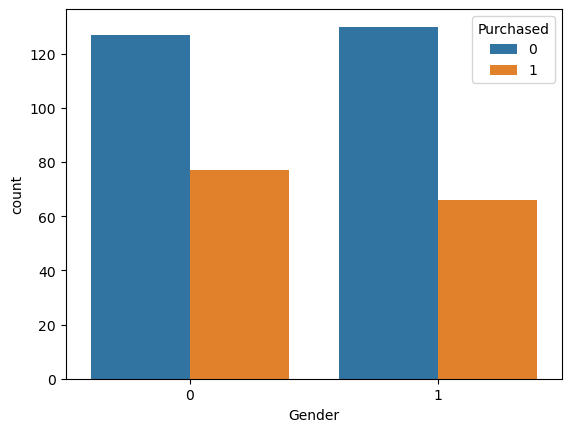

In [13]:
sns.countplot(x=df['Gender'],hue=df['Purchased'].astype(str))

### Plot a displot of Age

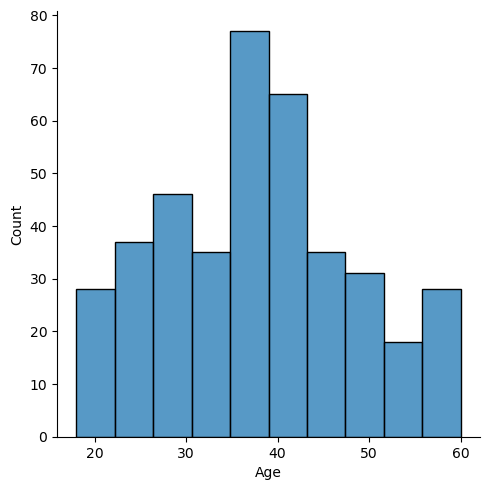

In [14]:
sns.displot(x=df['Age'])

### Plot pairplot of the dataset

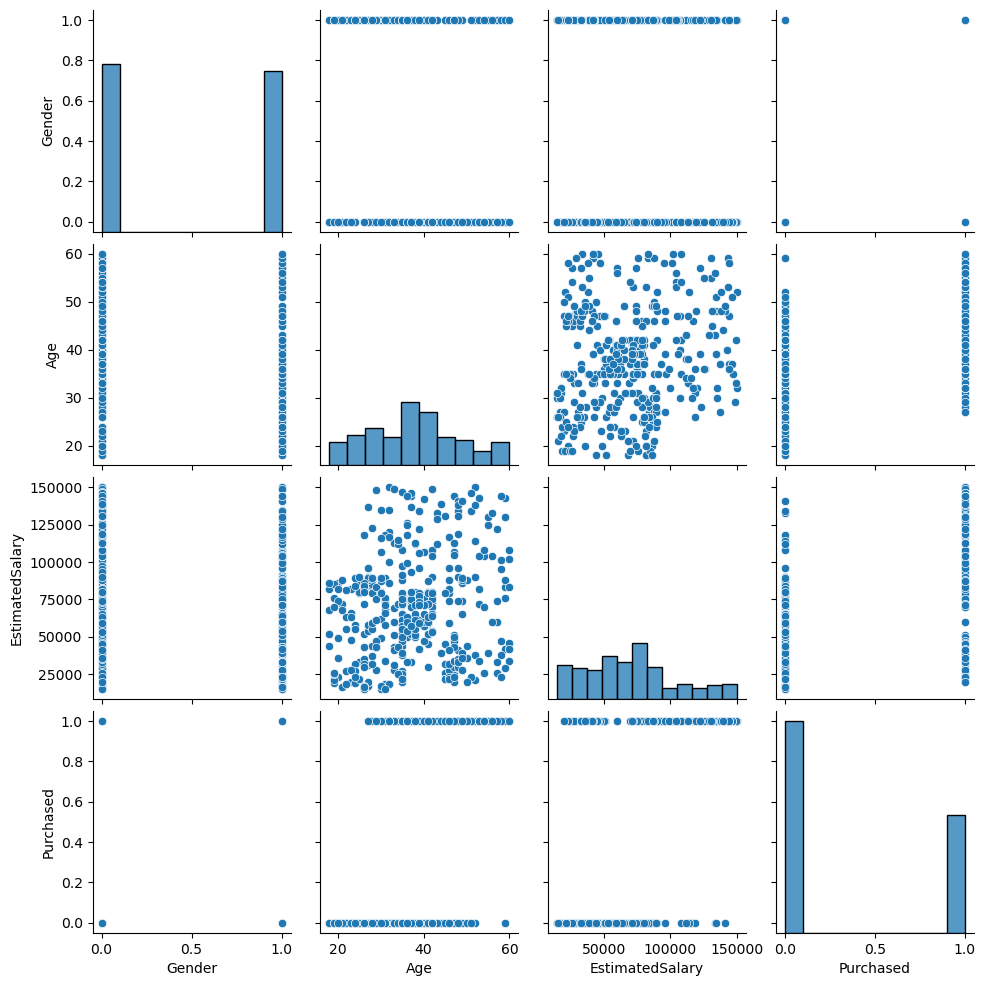

In [15]:
sns.pairplot(df)

In [16]:
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


## Data Preprocessing

### Split the dataset into input and target variables

In [23]:
X = df.drop('Purchased',axis=1)

In [24]:
y = df['Purchased']

### Scale the data using StandardScaler

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
ss = StandardScaler()
X = pd.DataFrame(ss.fit_transform(X),columns=ss.get_feature_names_out())

In [27]:
X.head()

,Gender,Age,EstimatedSalary
0,1.020204,-1.781797,-1.490046
1,1.020204,-0.253587,-1.460681
2,-0.980196,-1.113206,-0.785290
3,-0.980196,-1.017692,-0.374182
4,1.020204,-1.781797,0.183751


### Split the dataset into training and testing set

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=42)

### Check shape of X_train and X_test

In [30]:
X_train.shape

(280, 3)

In [31]:
X_test.shape

(120, 3)

## ML Models

### Logistic Regression Classifier

In [32]:
from sklearn.linear_model import LogisticRegression
from  sklearn import metrics
from sklearn.model_selection import cross_val_score

In [33]:
cv_score_list = {}
def model_score(model):
    model.fit(X_train,y_train)
    print('The score of our trained model is :',model.score(X_train,y_train),end='\n\n')
    print('#'*100)
    y_pred = model.predict(X_test)
    print('The accuracy score of the model :',metrics.accuracy_score(y_test,y_pred),end='\n\n')
    print('#'*100)
    print('confusion metrics')
    print(metrics.confusion_matrix(y_test,y_pred),end='\n\n')
    print('#'*100,end='\n\n')
    print(metrics.classification_report(y_test,y_pred))
    print('#'*100,end='\n\n')
    cv_score = np.mean(cross_val_score(model,X_train,y_train))
    print('Cross validation Score Mean :',cv_score)
    cv_score_list[str(model)[:-2]] = cv_score
    

In [34]:
model_score(LogisticRegression())

The score of our trained model is : 0.8214285714285714

####################################################################################################
The accuracy score of the model : 0.8583333333333333

####################################################################################################
confusion metrics
[[71  2]
 [15 32]]

####################################################################################################

              precision    recall  f1-score   support

           0       0.83      0.97      0.89        73
           1       0.94      0.68      0.79        47

    accuracy                           0.86       120
   macro avg       0.88      0.83      0.84       120
weighted avg       0.87      0.86      0.85       120

####################################################################################################

Cross validation Score Mean : 0.8214285714285715


### Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
model_score(RandomForestClassifier(n_estimators=20))

The score of our trained model is : 0.9964285714285714

####################################################################################################
The accuracy score of the model : 0.875

####################################################################################################
confusion metrics
[[68  5]
 [10 37]]

####################################################################################################

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        73
           1       0.88      0.79      0.83        47

    accuracy                           0.88       120
   macro avg       0.88      0.86      0.87       120
weighted avg       0.88      0.88      0.87       120

####################################################################################################

Cross validation Score Mean : 0.8821428571428571


### Support Vector Machine

In [37]:
from sklearn.svm import SVC

In [38]:
model_score(SVC())

The score of our trained model is : 0.9035714285714286

####################################################################################################
The accuracy score of the model : 0.9333333333333333

####################################################################################################
confusion metrics
[[68  5]
 [ 3 44]]

####################################################################################################

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        73
           1       0.90      0.94      0.92        47

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120

####################################################################################################

Cross validation Score Mean : 0.9


### Assign cross val scores of all models into a dataframe

In [39]:
cv_score_list

{'LogisticRegression': 0.8214285714285715,
 'RandomForestClassifier(n_estimators=2': 0.8821428571428571,
 'SVC': 0.9}

In [40]:
pd.DataFrame(cv_score_list,index=[0]).T.reset_index().rename(columns={'index':'Model',0:'Score'})

,Model,Score
0,LogisticRegression,0.821429
1,RandomForestClassifier(n_estimators=2,0.882143
2,SVC,0.900000


***

## Deploy the model with highest score using Tkinter

In [41]:
### In this case its SVM Classifier

#### Import all modules from Tkinter

In [42]:
from tkinter import *
from tkinter import ttk
import pickle
from PIL import Image, ImageTk
import numpy as np

### Define a function that will output to an entry box in Tkinter

In [43]:
with open('model.pkl','rb') as f:
    new_model = pickle.load(f)
def predict_output(age,estimated_salary,is_male=1,):
    observation = np.array([age,
              estimated_salary])
    prediction_value = new_model.predict(observation.reshape(1,-1))
    if prediction_value[0]==1:
        print('Person will Purchase')
    else:
        print('Person will not Purchase')

predict_output(22,1,20000)

Person will Purchase


### Create Tkinter window with all necessary entryboxes and labels

In [50]:
root = Tk()
root.geometry('500x500')
root.resizable(False,False)

with open('model.pkl','rb') as f:
    new_model = pickle.load(f)

def predict_out():
    if gender_var.get() == 'male':
        gender=1
    else:
        gender=0
        
    observation = np.array([gender,int(age_entry.get()),
              int(salary_entry.get())
             ])
    print(observation.reshape(1,-1))
    prediction_value = new_model.predict(observation.reshape(1,-1))
    if prediction_value[0]==1:
        prediction_var.set('Person will Purchase')
    else:
        prediction_var.set('Person will not Purchase')

# Main Title
Label(master=root,text='Customer Behaviour Classification',bg='#04a4b0',fg='white',font=('serif',18,'bold'),width='30',height=2).pack()

# New Frame for Input form
input_frame = Frame(root,width=500,height=400,highlightbackground='#04a4b0',highlightthickness=7)
input_frame.place(x=0,y=100)

image = Image.open("background.jpeg")
resize_image = image.resize((500,500))

background_image = ImageTk.PhotoImage(resize_image)
background_label = Label(input_frame, image=background_image)
background_label.place(x=0, y=0, relwidth=1, relheight=1)

# label for age
age_label = Label(master=input_frame,text='Enter Age',bg='#04a4b0',fg='white',width='25',height=2,font=('serif',10,'bold'))
age_label.place(x=30,y=60)

# Entry space for age
age_entry = Entry(master=input_frame,width='16',bg='#04a4b0',font=('Ariel',15),fg='white')
age_entry.place(x=280,y=67)

# Variable to store radiobutton chooosing value
gender_var = IntVar()
# setting defualt
gender_var.set(0)

# gender label
sex_label = Label(master=input_frame,text='Choose your Sex',bg='#04a4b0',fg='white',width='25',height=2,font=('serif',10,'bold'))
sex_label.place(x=30,y=125)

# gender radio button - Male
radio_male = Radiobutton(master=input_frame,text='Male   ',value=0,variable=gender_var,bg='#04a4b0',font=('serif',12,'bold'))
radio_male.place(x=380,y=130)

# gender radio button - Male
radio_female = Radiobutton(master=input_frame,text='Female',value=1,variable=gender_var,bg='#04a4b0',font=('serif',12,'bold'))
radio_female.place(x=280,y=130)



# Variable to store radiobutton chooosing value
salary_var = IntVar()

# label for age
salary_label = Label(master=input_frame,text='Enter Salary',bg='#04a4b0',fg='white',width='25',height=2,font=('serif',10,'bold'))
salary_label.place(x=30,y=195)

# Entry space for age
salary_entry = Entry(master=input_frame,width='16',bg='#04a4b0',fg='white',font=('serif',15))
salary_entry.place(x=280,y=200)


# Prediction Button and Entry
prediction_var = StringVar()
prediction_var.set(' ')
predict_button = Button(input_frame, text = 'Predict',width=10 , bg='#04a4b0',fg='white',font=('serif',10,'bold'),command=predict_out)
predict_button.place(x=196,y=320)
prediction_entry = Entry(master=input_frame,width=21,bd=5,bg='#087880',textvariable=prediction_var,font=('serif',12,'bold'))
prediction_entry.place(x=147,y=270)


root.mainloop()

***